In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

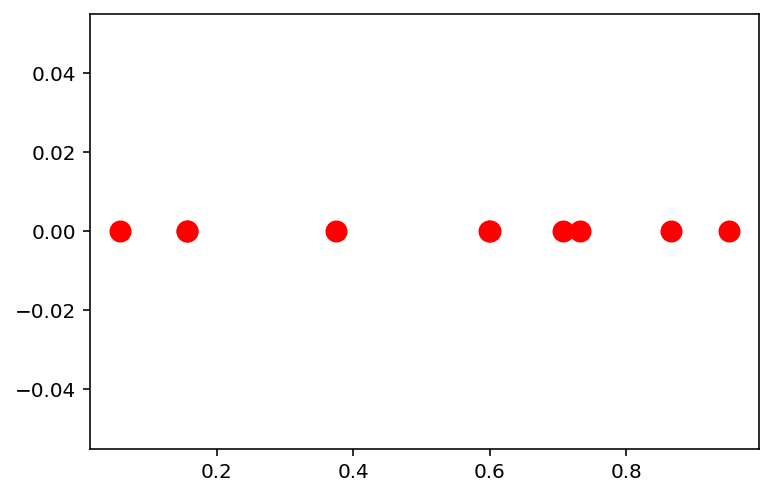

In [35]:
# 
n = 10
np.random.seed(42)
# Get `n` points in 1d space uniformly distributed from 0 to 1
x = np.random.uniform(0, 1, n)
plt.scatter(x, np.zeros(n), c='r', s=100)

Ratio of distances: [0.040316]


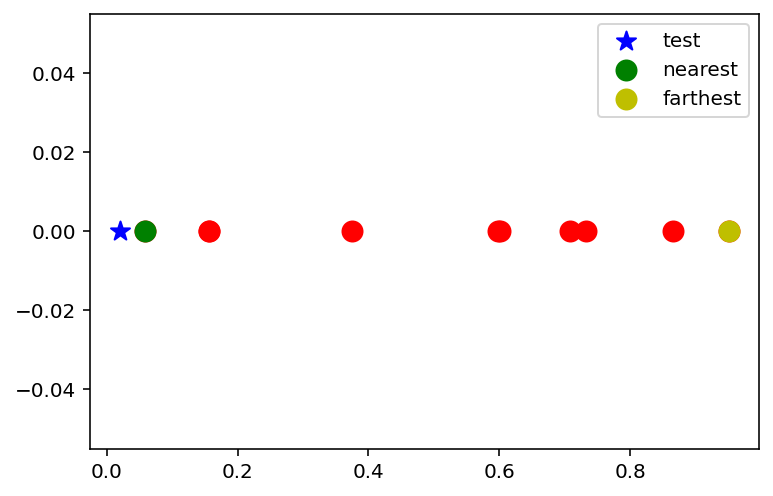

In [36]:
# Pick a random test point

x_test = np.random.uniform(0, 1, 1)


# Mark the nearest point and farthest point
x_nearest = x[np.argmin(np.abs(x - x_test))]
x_farthest = x[np.argmax(np.abs(x - x_test))]

plt.scatter(x, np.zeros(n), c='r', s=100)
plt.scatter(x_test, 0, c='b', s=100, marker='*', label='test')
plt.scatter(x_nearest, 0, c='g', s=100, label='nearest')
plt.scatter(x_farthest, 0, c='y', s=100, label='farthest')
plt.legend()

ratio = np.abs(x_test - x_nearest) / np.abs(x_test - x_farthest)
print('Ratio of distances: {}'.format(ratio))

In [37]:
# Do the above experiment for 1000 times

n = 10
np.random.seed(42)

n_exp = 1000
ratios = np.zeros(n_exp)
for i in range(n_exp):
    x = np.random.uniform(0, 1, n)
    x_test = np.random.uniform(0, 1, 1)
    x_nearest = x[np.argmin(np.abs(x - x_test))]
    x_farthest = x[np.argmax(np.abs(x - x_test))]
    ratios[i] = np.abs(x_test - x_nearest) / np.abs(x_test - x_farthest)

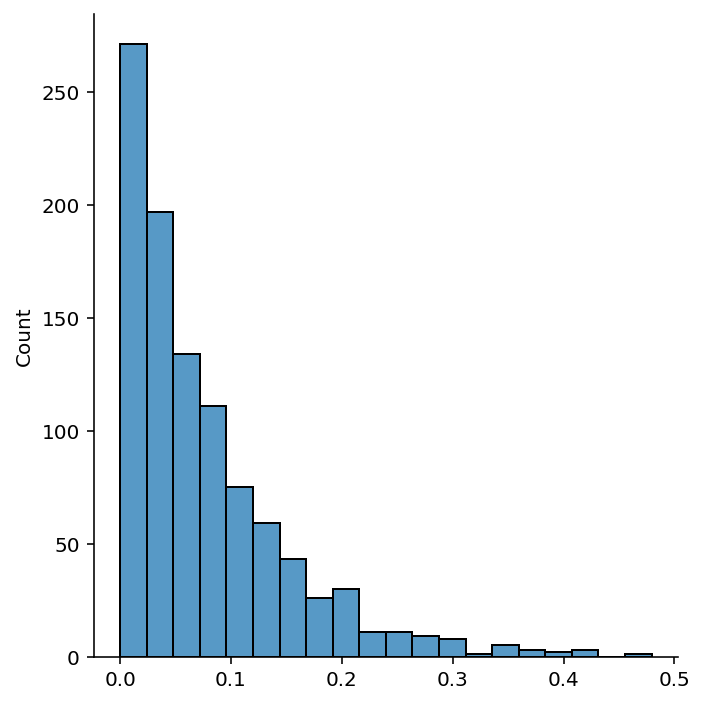

In [38]:
import seaborn as sns
sns.displot(ratios, kde=False, bins=20)

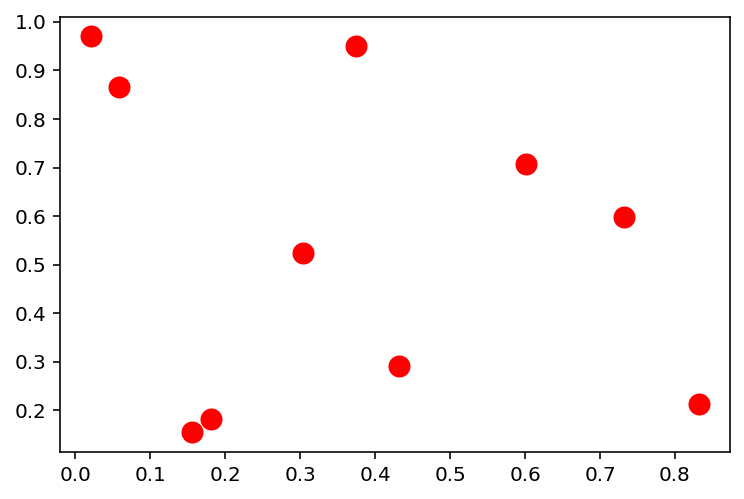

In [39]:
# Repeat the experiment in 2d

n = 10
np.random.seed(42)
x = np.random.uniform(0, 1, (n, 2))
plt.scatter(x[:, 0], x[:, 1], c='r', s=100)

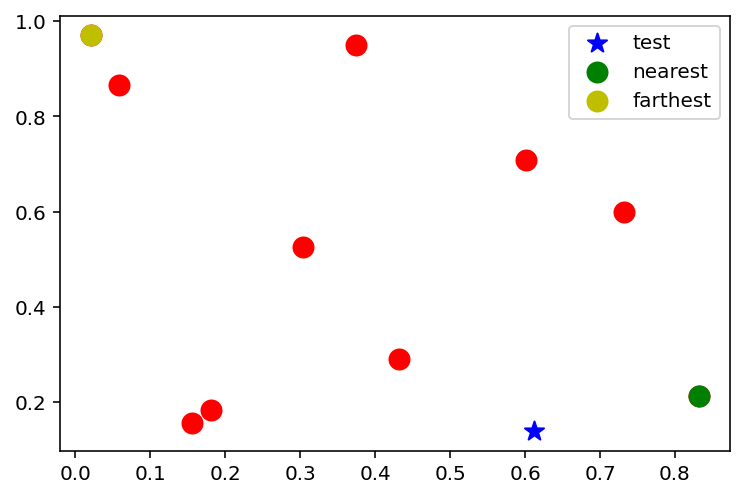

In [40]:
# Pick a random test point

x_test = np.random.uniform(0, 1, 2)

# Mark the nearest point and farthest point
x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]

plt.scatter(x[:, 0], x[:, 1], c='r', s=100)
plt.scatter(x_test[0], x_test[1], c='b', s=100, marker='*', label='test')
plt.scatter(x_nearest[0], x_nearest[1], c='g', s=100, label='nearest')
plt.scatter(x_farthest[0], x_farthest[1], c='y', s=100, label='farthest')
plt.legend()

In [41]:
# Find the ratio of distances between the nearest and farthest points in 1000 experiments

n = 10
np.random.seed(42)

ratios_2d = np.zeros(n_exp)
for i in range(n_exp):
    x = np.random.uniform(0, 1, (n, 2))
    x_test = np.random.uniform(0, 1, 2)
    x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
    x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
    ratios_2d[i] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)

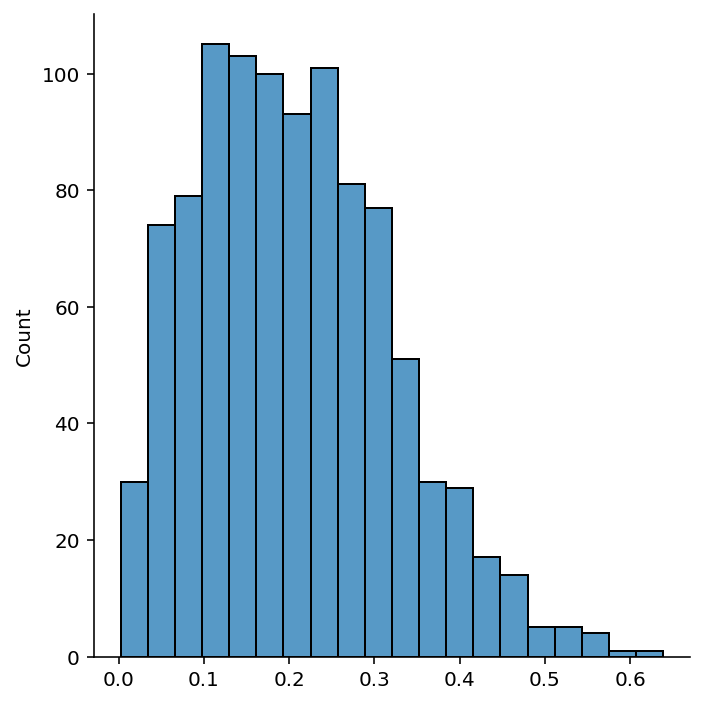

In [42]:
sns.displot(ratios_2d, kde=False, bins=20)

In [43]:
# Now, let's do the same experiment in dimensions varying from 1 to 20

n = 10
np.random.seed(42)
n_dim = 40
ratios_nd = np.zeros((n_exp, n_dim))
for i in range(n_exp):
    for d in range(1, n_dim + 1):
        x = np.random.uniform(0, 1, (n, d))
        x_test = np.random.uniform(0, 1, d)
        x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
        x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
        ratios_nd[i, d - 1] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)


(0.0, 1.0)

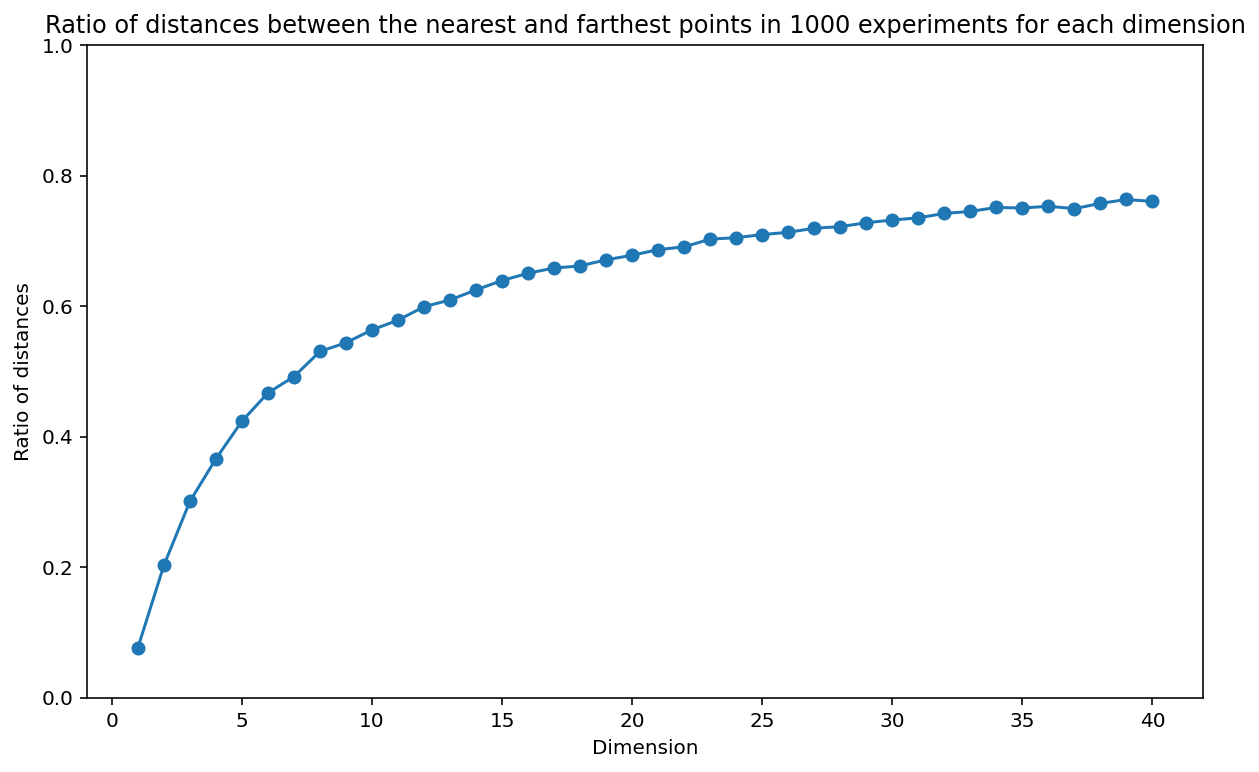

In [44]:
# Plot the ratio of distances between the nearest and farthest points in 1000 experiments for each dimension

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_dim + 1), np.mean(ratios_nd, axis=0), 'o-')
plt.xlabel('Dimension')
plt.ylabel('Ratio of distances')
plt.title('Ratio of distances between the nearest and farthest points in 1000 experiments for each dimension')
plt.ylim(0, 1.)

In [45]:
# Let us now see what happens if we have more points in higher dimensions
# 1d space: 10 points

n = 10
np.random.seed(42)
n_dim = 4
ratios_nd_more_points = np.zeros((n_exp, n_dim))
num_points = [10, 50, 200, 2000]
for i in range(n_exp):
    for d in range(1, n_dim + 1):
        x = np.random.uniform(0, 1, (num_points[d-1], d))
        x_test = np.random.uniform(0, 1, d)
        x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
        x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
        ratios_nd_more_points[i, d - 1] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)


(0.0, 1.0)

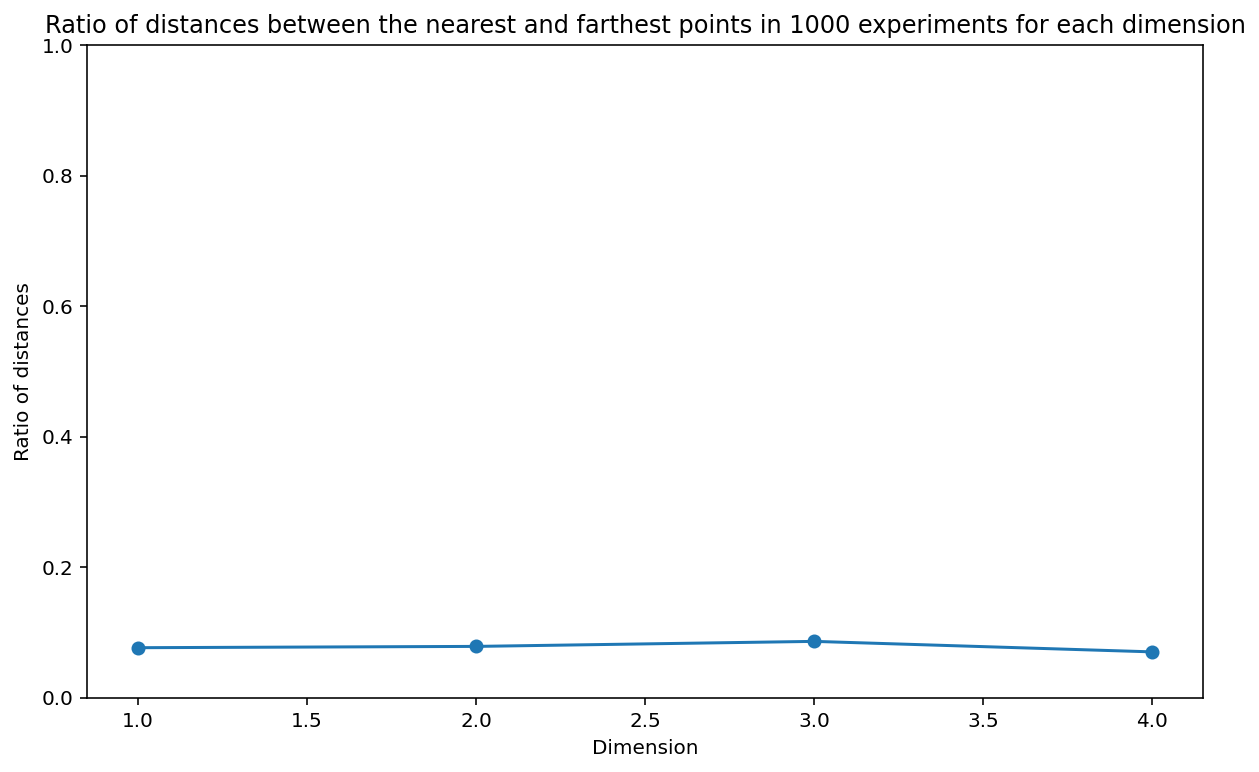

In [46]:
# Plot the ratio of distances between the nearest and farthest points in 1000 experiments for each dimension

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_dim + 1), np.mean(ratios_nd_more_points, axis=0), 'o-')
plt.xlabel('Dimension')
plt.ylabel('Ratio of distances')
plt.title('Ratio of distances between the nearest and farthest points in 1000 experiments for each dimension')
plt.ylim(0, 1)